In [30]:
import os
import pandas as pd
import numpy as np
import datetime
import tqdm
import json

import matplotlib.pyplot as plt

### Setting Directory

In [31]:

image_dir = 'D:\Sun Data'
# Path to the JSON file
file_path = 'D:\\Dissertation\\Kp data\\kpdata.json'




### Opening Kp and converting to Dataframe
#### Export as CSV

                   datetime     Kp
0 2011-01-01 00:00:00+00:00  1.333
1 2011-01-01 03:00:00+00:00  0.667
2 2011-01-01 06:00:00+00:00  0.000
3 2011-01-01 09:00:00+00:00  0.667
4 2011-01-01 12:00:00+00:00  1.000


C:\Users\mirzi\AppData\Local\Temp\ipykernel_68004\802931089.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['datetime'].dt.to_period('M')


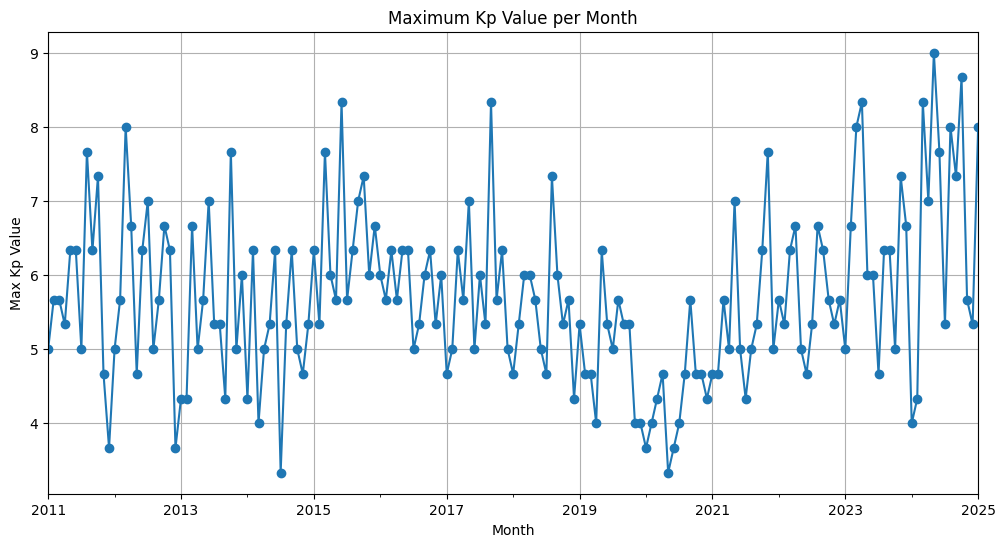

In [32]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert datetime and Kp values to numpy arrays
datetime_array = np.array(data['datetime'])
Kp = np.array(data['Kp'])

df = pd.DataFrame({'datetime': datetime_array, 'Kp': Kp})
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime format
print(df.head())

df.to_csv('D:\\Dissertation\\Kp data\\kpdata.csv', index=False)
# Resample the dataframe to get the maximum Kp value per month
df['year_month'] = df['datetime'].dt.to_period('M')
max_kp_per_month = df.groupby('year_month')['Kp'].max()

# Plot the line graph
plt.figure(figsize=(12, 6))
max_kp_per_month.plot(kind='line', marker='o')
plt.title('Maximum Kp Value per Month')
plt.xlabel('Month')
plt.ylabel('Max Kp Value')
plt.grid(True)
plt.show()

### Making list of images

In [36]:
# List all files in the image directory
image_files = []
# for root, dirs, files in os.walk(image_dir):
#     image_files += [os.path.join(root, f) for f in os.listdir(root) if f.endswith('.fits')]
    # image_files += [os.path.join(image_directory, f).replace('D:\\Dissertation\\Preprocessing\\', '/content/') for f in os.listdir(image_directory) if f.endswith('.jp2')]
    # image_files = [f.replace('\\', '/') for f in image_files]
    
image_files += [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.fits')]
print(f'Found {len(image_files)} Image files')
print(image_files[:5])

Found 119985 Image files
['D:\\Sun Data\\aia.lev1.193A_2010_06_01T00_00_00.62Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T01_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T02_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T03_00_06.61Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T04_00_06.62Z.image_lev1.fits']


#### Checking for missing or extra images

Total days: 5161
Days with irregular image counts: 2069
Total missing images: 3879

Days with irregular image counts:
Date: 2012-01-01, Images: 1
Date: 2012-11-14, Images: 1
Date: 2017-04-30, Images: 2
Date: 2020-07-18, Images: 2
Date: 2020-07-20, Images: 5
Date: 2016-08-10, Images: 6
Date: 2018-06-28, Images: 6
Date: 2015-12-27, Images: 8
Date: 2021-04-29, Images: 11
Date: 2022-01-01, Images: 11
Date: 2016-08-02, Images: 12
Date: 2022-01-03, Images: 12
Date: 2015-04-01, Images: 13
Date: 2019-04-15, Images: 14
Date: 2021-07-07, Images: 14
Date: 2010-07-14, Images: 15
Date: 2010-11-04, Images: 15
Date: 2011-01-27, Images: 15
Date: 2016-05-09, Images: 15
Date: 2021-01-13, Images: 15
Date: 2012-02-24, Images: 16
Date: 2016-09-07, Images: 16
Date: 2018-04-11, Images: 16
Date: 2021-10-20, Images: 16
Date: 2022-04-20, Images: 16
Date: 2010-07-15, Images: 17
Date: 2011-04-06, Images: 17
Date: 2012-04-04, Images: 17
Date: 2013-04-03, Images: 17
Date: 2015-05-13, Images: 17
Date: 2015-07-22, Im

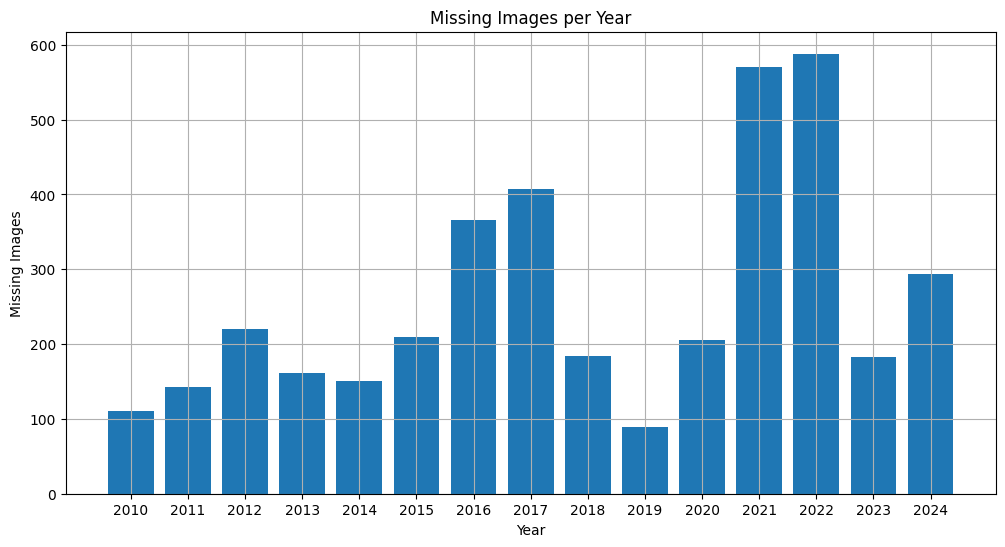

In [37]:

# Extract dates from image filenames
date_counts = {}
for image_path in image_files:
    image_filename = image_path.split('\\')[-1]
    
    # Extract date components from filename
    try:
        year = image_filename[14:18]
        month = image_filename[19:21]
        day = image_filename[22:24]
        # Create a date string
        date_str = f"{year}-{month}-{day}"
        
        # Increment count for this date
        if date_str in date_counts:
            date_counts[date_str] += 1
        else:
            date_counts[date_str] = 1
    except IndexError:
        print(f"Error processing filename: {image_filename}")
        continue

irregular_days = {}
missing_images_count = 0
# Check which days don't have exactly 24 images
for date, count in date_counts.items():
    if count != 24:
        # print(f"Date: {date}, Images: {count}")
        irregular_days[date] = count
        missing_images_count += 24 - count
    

print(f"Total days: {len(date_counts)}")
print(f"Days with irregular image counts: {len(irregular_days)}")
print(f"Total missing images: {missing_images_count}")

# Print the irregular days and their image counts
if irregular_days:
    print("\nDays with irregular image counts:")
    for date, count in sorted(irregular_days.items(), key=lambda x: x[1]):
        print(f"Date: {date}, Images: {count}")
else:
    print("All days have exactly 24 images.")
    
# plot of images missing per year
missing_images_per_year = {}
for date, count in date_counts.items():
    year = date.split('-')[0]
    if year in missing_images_per_year:
        missing_images_per_year[year] += 24 - count
    else:
        missing_images_per_year[year] = 24 - count

plt.figure(figsize=(12, 6))
plt.bar(missing_images_per_year.keys(), missing_images_per_year.values())
plt.title('Missing Images per Year')
plt.xlabel('Year')
plt.ylabel('Missing Images')
plt.grid(True)
plt.show()


### Grouping images by 10

In [38]:
count = 0
group = []
for i in range(0, len(image_files), 10):
    group += [image_files[i:i+10]]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
group = group[0: -1]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])

11999
10
5
[['D:\\Sun Data\\aia.lev1.193A_2010_06_01T00_00_00.62Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T01_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T02_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T03_00_06.61Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T04_00_06.62Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T05_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T06_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T07_00_06.62Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T08_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T09_00_06.61Z.image_lev1.fits'], ['D:\\Sun Data\\aia.lev1.193A_2010_06_01T10_00_06.62Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T11_00_06.64Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T12_00_06.60Z.image_lev1.fits', 'D:\\Sun Data\\aia.lev1.193A_2010_06_01T13_00_06.65Z.image_lev

In [39]:
list_of_dates = []
for i in group:
    last_image = i[-1].split('\\')[-1]
    year = last_image[14:18]
    month = last_image[19:21]
    day = last_image[22:24]
    hour = last_image[25:27]
    date = datetime.datetime(int(year), int(month), int(day), int(hour))
    list_of_dates.append(date)
print(len(list_of_dates))
for date in list_of_dates:
    print(date)

11998
2010-06-01 09:00:00
2010-06-01 19:00:00
2010-06-02 05:00:00
2010-06-02 15:00:00
2010-06-03 01:00:00
2010-06-03 11:00:00
2010-06-03 21:00:00
2010-06-04 07:00:00
2010-06-04 17:00:00
2010-06-05 04:00:00
2010-06-05 14:00:00
2010-06-06 00:00:00
2010-06-06 10:00:00
2010-06-06 20:00:00
2010-06-07 06:00:00
2010-06-07 16:00:00
2010-06-08 02:00:00
2010-06-08 17:00:00
2010-06-09 03:00:00
2010-06-09 13:00:00
2010-06-10 00:00:00
2010-06-10 10:00:00
2010-06-10 20:00:00
2010-06-11 06:00:00
2010-06-11 16:00:00
2010-06-12 02:00:00
2010-06-12 12:00:00
2010-06-12 22:00:00
2010-06-13 08:00:00
2010-06-13 18:00:00
2010-06-14 04:00:00
2010-06-14 14:00:00
2010-06-15 00:00:00
2010-06-15 10:00:00
2010-06-15 20:00:00
2010-06-16 06:00:00
2010-06-16 16:00:00
2010-06-17 02:00:00
2010-06-17 12:00:00
2010-06-17 23:00:00
2010-06-18 09:00:00
2010-06-18 19:00:00
2010-06-19 05:00:00
2010-06-19 15:00:00
2010-06-20 01:00:00
2010-06-20 11:00:00
2010-06-20 21:00:00
2010-06-21 07:00:00
2010-06-21 17:00:00
2010-06-22 03:

In [40]:
matched_kp = []
matched_kp_index = []
# Convert datetime column to datetime type if it's not already and remove timezone information
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
for i in range(len(list_of_dates)):
    date = list_of_dates[i]
    date = date + datetime.timedelta(days=2)
    match = df[df['datetime'] >= date][0:1]
    if match.empty:
        print(f'No match found for {date}')
    matched_kp += match['datetime'].tolist()
    matched_kp_index += match.index.tolist()
    
print(len(matched_kp))
print(len(matched_kp_index))
print(matched_kp[:5])
print(list_of_dates[:5])

11998
11998
[Timestamp('2011-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00')]
[datetime.datetime(2010, 6, 1, 9, 0), datetime.datetime(2010, 6, 1, 19, 0), datetime.datetime(2010, 6, 2, 5, 0), datetime.datetime(2010, 6, 2, 15, 0), datetime.datetime(2010, 6, 3, 1, 0)]


In [41]:
max_Kp_values = []
for index in matched_kp_index:
    kp_values = Kp[index: index + 9]
    max_Kp = max(kp_values)
    max_Kp_values.append(max_Kp)
print(len(max_Kp_values))  


11998


count    11998.000000
mean         2.840886
std          1.326721
min          0.000000
25%          2.000000
50%          2.667000
75%          3.667000
max          9.000000
Name: Kp, dtype: float64


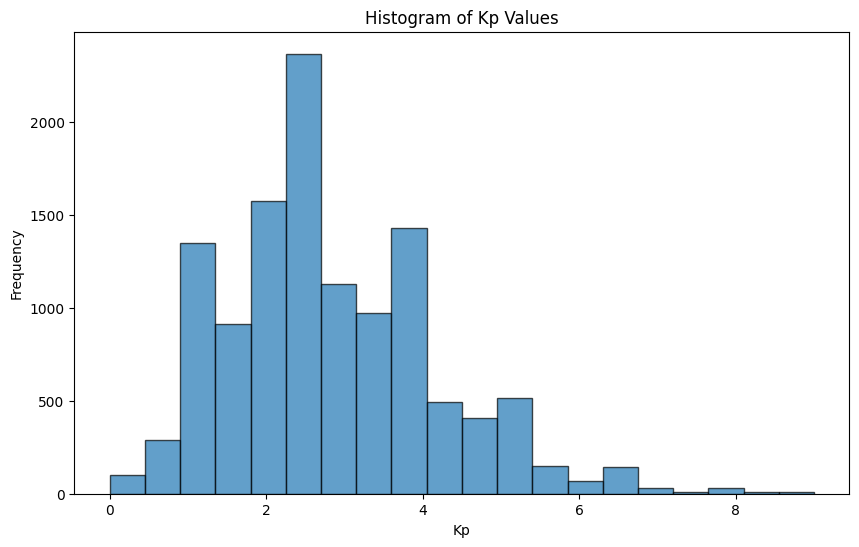

In [42]:
# Convert group to a DataFrame and export as CSV
group_df = pd.DataFrame({'Images': group, 'Kp': max_Kp_values})
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values
kp_stats = group_df['Kp'].describe()
print(kp_stats)


# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()




count    2000.000000
mean        2.840162
std         1.338848
min         0.000000
25%         2.000000
50%         2.667000
75%         3.667000
max         9.000000
Name: Kp, dtype: float64


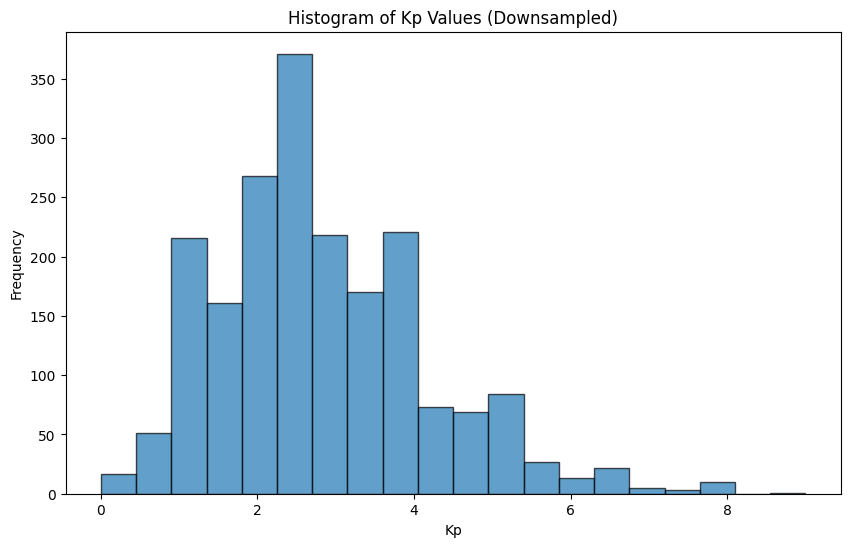

In [43]:
group_df = group_df[::6]
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values for the downsampled group_df
kp_stats_downsampled = group_df['Kp'].describe()
print(kp_stats_downsampled)

# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values (Downsampled)')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()


In [20]:
# Count the number of Kp values greater than 5
count_greater_than_5 = group_df[group_df['Kp'] > 5].shape[0]

# Count the number of Kp values less than 5
count_less_than_5 = group_df[group_df['Kp'] < 5].shape[0]

print(f'Number of Kp values greater than 5: {count_greater_than_5}')
print(f'Number of Kp values less than 5: {count_less_than_5}')

Number of Kp values greater than 5: 122
Number of Kp values less than 5: 1833


In [44]:
# from sklearn.utils import resample

# # Separate the data into two groups
# group_df_high_kp = group_df[group_df['Kp'] > 5]
# group_df_low_kp = group_df[group_df['Kp'] <= 5]

# # Oversample the high Kp group to match the size of the low Kp group
# group_df_high_kp_oversampled = resample(group_df_high_kp, 
#                                         replace=True,  # Sample with replacement

#                                         n_samples=len(group_df_low_kp),
#                                         random_state=42)
# # Sort the oversampled data by the original index
# group_df_high_kp_oversampled = group_df_high_kp_oversampled.sort_index()

# # Initialize an empty DataFrame to store the balanced data
# group_df_balanced = pd.DataFrame()

# # Iterate through the original DataFrame
# for index, row in group_df.iterrows():
#     # Append the original row to the balanced DataFrame
#     group_df_balanced = pd.concat([group_df_balanced, pd.DataFrame([row])], ignore_index=False)
    
#     # If the current row has a Kp value greater than 5, append an oversampled row immediately after it
#     if row['Kp'] > 5:
#         oversampled_row = group_df_high_kp_oversampled.loc[[index]]
#         group_df_balanced = pd.concat([group_df_balanced, oversampled_row], ignore_index=False)

# # Reset the index of the balanced DataFrame
# group_df_balanced = group_df_balanced.reset_index(drop=True)


# # Combine the oversampled high Kp group with the low Kp group
# group_df_balanced = pd.concat([group_df_low_kp, group_df_high_kp_oversampled])

# print(group_df_balanced['Kp'].value_counts())

# for index, row in group_df_balanced.iterrows():
#     print(f"Index: {index}, Kp: {row['Kp']}, Images: {row['Images']}")
    
# group_df_balanced.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# # Calculate statistics of Kp values for the downsampled group_df
# kp_stats_downsampled = group_df_balanced['Kp'].describe()
# print(kp_stats_downsampled)

# # Histogram of Kp values
# plt.figure(figsize=(10, 6))
# plt.hist(group_df_balanced['Kp'], bins=20, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Kp Values (Downsampled)')
# plt.xlabel('Kp')
# plt.ylabel('Frequency')
# plt.show()

Original DataFrame size: 2000
Number of rows with Kp < 3: 1087
Number of rows removed: 500
New DataFrame size: 1500

Kp statistics after balancing:
count    1500.000000
mean        3.144211
std         1.376928
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Kp, dtype: float64


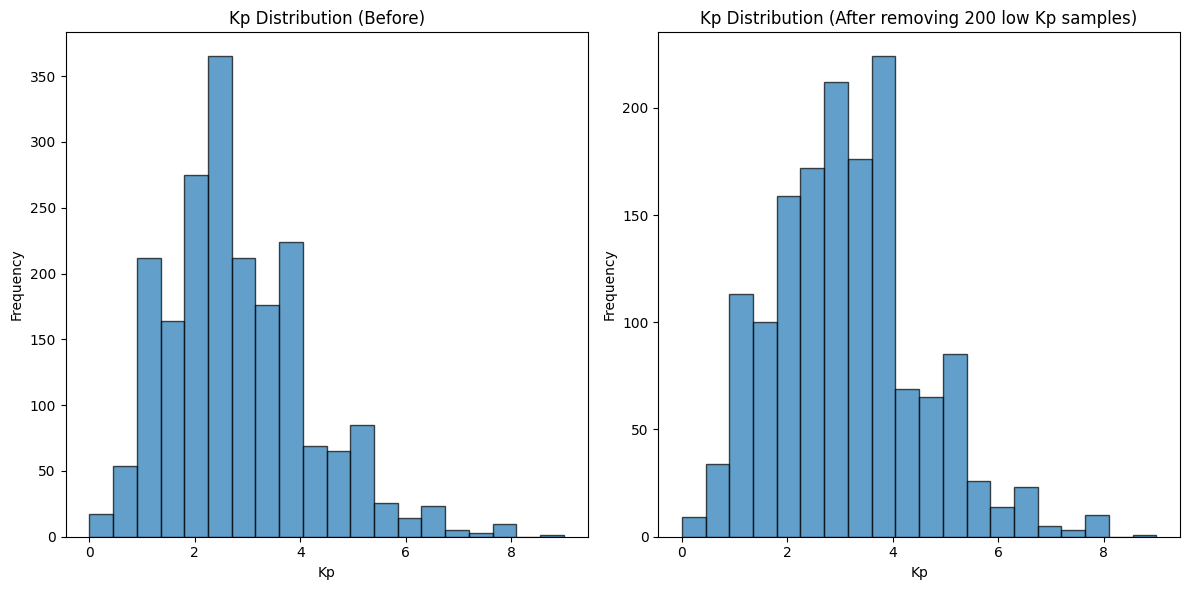

In [29]:
import random

# Identify rows with Kp < 3
low_kp_indices = group_df[group_df['Kp'] < 3].index

# Randomly select 200 rows with low Kp to remove (if there are enough)
if len(low_kp_indices) >= 500:
    indices_to_remove = random.sample(list(low_kp_indices), 500)
    # Create a new DataFrame excluding the selected rows
    group_df_balanced = group_df.drop(indices_to_remove)
    
    # Print statistics before and after
    print(f"Original DataFrame size: {len(group_df)}")
    print(f"Number of rows with Kp < 3: {len(low_kp_indices)}")
    print(f"Number of rows removed: {len(indices_to_remove)}")
    print(f"New DataFrame size: {len(group_df_balanced)}")
    
    # Calculate statistics of Kp values
    kp_stats_balanced = group_df_balanced['Kp'].describe()
    print("\nKp statistics after balancing:")
    print(kp_stats_balanced)
    
    # Save the balanced dataset
    group_df_balanced.to_csv('D:\\New folder (2)\\dataset_balanced.csv', index=False)
    
    # Plot histogram of Kp values before and after balancing
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Kp Distribution (Before)')
    plt.xlabel('Kp')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(group_df_balanced['Kp'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Kp Distribution (After removing 200 low Kp samples)')
    plt.xlabel('Kp')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough samples with Kp < 3. Only {len(low_kp_indices)} available.")